## Question 1

In [709]:
import sklearn
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 


[[0.46243492 0.4083584 ]
 [0.6371216  0.02736354]
 [0.08130426 0.55100813]
 [0.90685564 0.8879528 ]
 [0.12658739 0.60317264]
 [0.29568624 0.0373076 ]
 [0.56146816 0.13787986]
 [0.49070442 0.52744772]
 [0.36082132 0.04475096]
 [0.09374912 0.00468521]] [[ 1.]
 [ 1.]
 [-1.]
 [ 1.]
 [-1.]
 [ 1.]
 [ 1.]
 [-1.]
 [ 1.]
 [ 1.]]


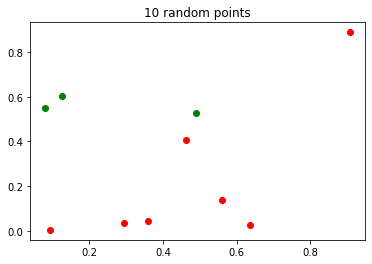

In [710]:
# Train points Generation - 1.1
X = np.random.rand(10,2)
labels = np.zeros((10,1))
for idx,row in enumerate(X):
    if(row[0] > row[1]):
        labels[idx] = 1
    else:
        labels[idx] = -1

for [x,y] in X:
    if(x>y):
        plt.scatter(x,y,color="r")
    else:
        plt.scatter(x,y,color="g")
plt.title("10 random points")
print(X,labels)





In [711]:
# Test points Generation - 1.1
X_test = np.random.rand(5000,2)
labels_test = np.zeros((5000,1))
for idx,row in enumerate(X_test):
    if(row[0] > row[1]):
        labels_test[idx] = 1
    else:
        labels_test[idx] = -1
#X[0]

In [712]:

# Normalization
def normalize(X,X_test):
    mu = sum(X)/len(X)
    var = np.var(X,axis = 0)
    X = (X - mu)/var
    X
    mut = sum(X_test)/len(X_test)
    vart = np.var(X_test,axis = 0)
    X_test = (X_test - mut)/vart


In [713]:
# Implementation of Perceptron - 1.1
class Perceptron:
    def __init__(self, learning_rate=0.01, n_iters=1000, criterion = "P"):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.criterion = criterion

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # init parameters
        if(self.criterion == "P"):
            w1 = np.random.random()
            #print(w1)
            self.weights = [w1, -2*w1]
            print("Init wts are ",self.weights)
        elif(self.criterion == "H"):
             w1 = 0.5*np.random.random() + 0.5
            #print(w1)
             self.weights = [w1, -2*w1]
             print("Init wts are ",self.weights)
        #y_ = np.array([1 if i > 0 else -1 for i in y])
        l = []
        for _ in range(self.n_iters):
            wts = []
            for idx, x_i in enumerate(X):
                lin = np.matmul(self.weights,x_i.T)
                if(self.criterion == "P"):
                    loss = max(0, -1*lin*y[idx])
                else:
                    loss = max(0,1-lin*y[idx])
                # Perceptron update rule
                update = self.lr * loss * x_i
                self.weights = self.weights + update
                wts.append(self.weights)
                l.append(loss)

    def accuracy_metric(self, X, y):
        linear_output = np.sign(np.matmul(self.weights, X.T))
        for i in range(len(X)):
            if(linear_output[i] == 0):
                linear_output[i] = -1
            
        
        correct = 0
        for i in range(len(linear_output)):
            if linear_output[i] == y[i]:
                correct += 1
        return correct / float(len(linear_output))

    

In [714]:
# Give criterion = H for Hinge loss, and P for Perceptron loss - 1.1 and 1.2
print("Perceptron\n")

criterion = "P"
p = Perceptron(learning_rate=0.0005, n_iters=10000, criterion=criterion)
p.fit(X, labels)
preds = []
acc = p.accuracy_metric(X_test, labels_test)
print("Final weights are ",p.weights)
trainacc = p.accuracy_metric(X, labels)
print(trainacc) #TRAIN ACCURACY
print(acc) #Test Accuracy


print("\nHinge\n")

criterion = "H"
q = Perceptron(learning_rate=0.05, n_iters=2, criterion=criterion)
normalize(X,X_test)
q.fit(X, labels)
preds = []
acc = q.accuracy_metric(X_test, labels_test)
print("Final weights are", q.weights)
trainacc = q.accuracy_metric(X, labels)
print(trainacc) #TRAIN ACCURACY
print(acc) #Test Accuracy



Perceptron

Init wts are  [0.76644276749909, -1.53288553499818]
Final weights are  [ 1.14341437 -1.16794948]
0.9
0.9866

Hinge

Init wts are  [0.7922528063413645, -1.584505612682729]
Final weights are [ 1.14493917 -1.31735963]
0.8
0.9308


I find that Perceptron Loss criterion gives better results more times on average than the hinge loss criterion. - 1.3

Hinge loss will not change as easily as Perceptron loss, as the objective is to minimize the number of classfication mistakes - 1.4

## Question 2

In [ ]:
! pip install deepreplay

  Using cached deepreplay-0.1.2a2-py2.py3-none-any.whl (26 kB)


In [ ]:
'''
from deepreplay.callbacks import ReplayData
from deepreplay.replay import Replay
from deepreplay.plot import compose_plots
from keras.initializers import normal
from matplotlib import pyplot as plt

filename = 'wt_init.h5'
group_name = 'sig_stdev_0.05'

# Uses normal initializer
initializer = normal(mean=0, stddev=0.05, seed=13)

# Builds BLOCK model
model = build_model(n_layers=5, input_dim=10, units=100, 
                    activation='sigmoid', initializer=initializer)

# Since we only need initial weights, we don't even need to train the model! 
# We still use the ReplayData callback, but we can pass the model as argument instead
replaydata = ReplayData(X, y, filename=filename, group_name=group_name, model=model)

# Now we feed the data to the actual Replay object
# so we can build the visualizations
replay = Replay(replay_filename=filename, group_name=group_name)

# Using subplot2grid to assemble a complex figure...
fig = plt.figure(figsize=(12, 6))
ax_zvalues = plt.subplot2grid((2, 2), (0, 0))
ax_weights = plt.subplot2grid((2, 2), (0, 1))
ax_activations = plt.subplot2grid((2, 2), (1, 0))
ax_gradients = plt.subplot2grid((2, 2), (1, 1))

wv = replay.build_weights(ax_weights)
gv = replay.build_gradients(ax_gradients)
# Z-values
zv = replay.build_outputs(ax_zvalues, before_activation=True, 
                          exclude_outputs=True, include_inputs=False)
# Activations
av = replay.build_outputs(ax_activations, exclude_outputs=True, include_inputs=False)

# Finally, we use compose_plots to update all
# visualizations at once
fig = compose_plots([zv, wv, av, gv], 
                    epoch=0, 
                    title=r'Activation: sigmoid - Initializer: Normal $\sigma = 0.05$')
'''

In [35]:
#q2.1
from keras.models import Sequential
from keras.layers import Dense, LeakyReLU

def build_model(n_layers, input_dim, units, activation, initializer):
    if isinstance(units, list):
        assert len(units) == n_layers
    else:
        units = [units] * n_layers
        
    model = Sequential()
    # Adds first hidden layer with input_dim parameter
    model.add(Dense(units=units[0], 
                    input_dim=input_dim, 
                    activation=activation,
                    kernel_initializer=initializer, 
                    name='h1'))
    
    # Adds remaining hidden layers
    for i in range(2, n_layers + 1):
        model.add(Dense(units=units[i-1], 
                        activation=activation, 
                        kernel_initializer=initializer, 
                        name='h{}'.format(i)))
    
    # Adds output layer
    model.add(Dense(units=1, activation=activation, name='o',kernel_initializer=initializer))
    # Compiles the model
    model.compile(loss='mse', optimizer='Adam', metrics=['mse'])
    return model

In [36]:
from deepreplay.datasets.ball import load_data

X, y = load_data(n_dims=10)

2.1 - Standard initialization with 0.05 std, Sigmoid activation

In [37]:

from keras.initializers import normal, GlorotNormal, HeNormal
initializer = normal(mean=0, stddev=0.05, seed=13)

stdsigmodel = build_model(n_layers=5, input_dim=10, units=100, 
                    activation='sigmoid', initializer=initializer)


In [38]:
stdsigmodel.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 h1 (Dense)                  (None, 100)               1100      
                                                                 
 h2 (Dense)                  (None, 100)               10100     
                                                                 
 h3 (Dense)                  (None, 100)               10100     
                                                                 
 h4 (Dense)                  (None, 100)               10100     
                                                                 
 h5 (Dense)                  (None, 100)               10100     
                                                                 
 o (Dense)                   (None, 1)                 101       
                                                                 
Total params: 41,601
Trainable params: 41,601
Non-trai

16/16 [==============================] - 1s 13ms/step - loss: 0.2450 - mse: 0.2450
h1
h2
h3
h4
h5


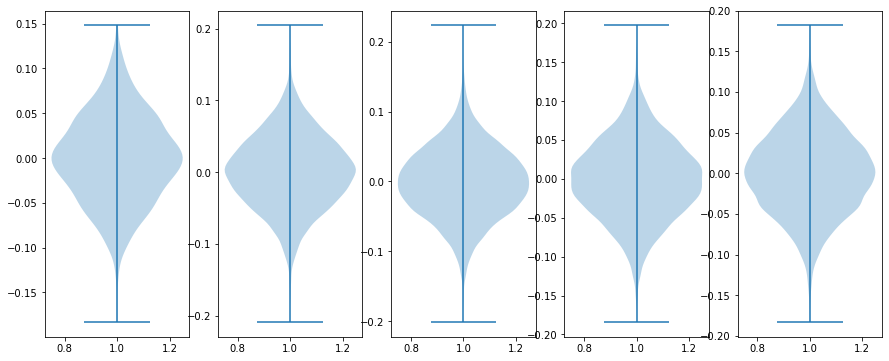

In [ ]:
# Weights after 1 epoch
stdsigmodel.fit(X,y,batch_size=64, epochs= 1)
import matplotlib.pyplot as plt
f,a = plt.subplots(1,5,figsize = (15,6))
j = 0
for i,lay in enumerate(stdsigmodel.layers):
    if(i != 5):
        print(lay.name)
        #print(lay.get_weights())
        laywts = np.ravel(lay.get_weights()[0])
        a[j].violinplot(dataset = laywts)
        j+=1 



2.1 - Standard initialization with 0.05 std, tanh activation

In [42]:
initializer = normal(mean=0, stddev=0.05, seed=13)

stdtanmodel = build_model(n_layers=5, input_dim=10, units=100, 
                    activation='tanh', initializer=initializer)
hstdtan = stdtanmodel.fit(X,y,batch_size=64, epochs= 1)  



16/16 [==============================] - 0s 4ms/step - loss: 0.4406 - mse: 0.4406


h1
h2
h3
h4
h5


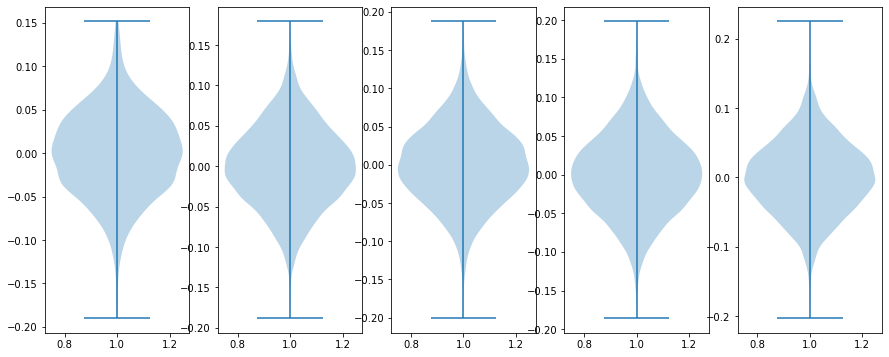

In [43]:
import matplotlib.pyplot as plt
f,a = plt.subplots(1,5,figsize = (15,6))
j = 0
for i,lay in enumerate(stdtanmodel.layers):
    if(i != 5):
        print(lay.name)
        #print(lay.get_weights())
        laywts = np.ravel(lay.get_weights()[0])
        a[j].violinplot(dataset = laywts)
        j+=1 

2.1 - Standard initialization with 0.5 std, Sigmoid activation

In [44]:
initializer = normal(mean=0, stddev=0.5, seed=13)

std05sigmodel = build_model(n_layers=5, input_dim=10, units=100, 
                    activation='sigmoid', initializer=initializer)
hstd05sig = std05sigmodel.fit(X,y,batch_size=64, epochs= 1)  

16/16 [==============================] - 0s 5ms/step - loss: 0.2721 - mse: 0.2721


h1
h2
h3
h4
h5


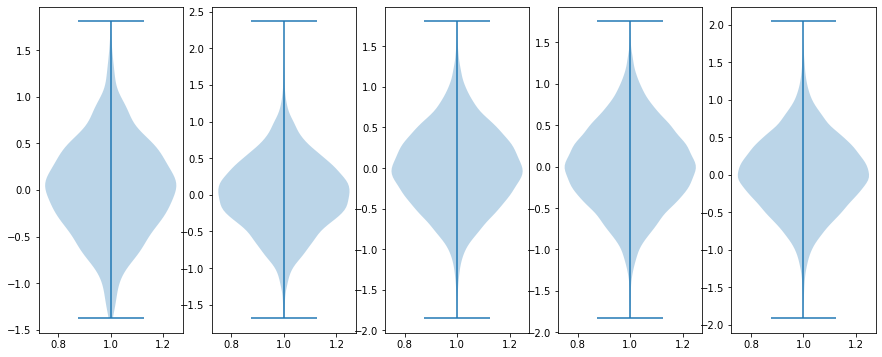

In [45]:
import matplotlib.pyplot as plt
f,a = plt.subplots(1,5,figsize = (15,6))
j = 0
for i,lay in enumerate(std05sigmodel.layers):
    if(i != 5):
        print(lay.name)
        laywts = np.ravel(lay.get_weights()[0])
        a[j].violinplot(dataset = laywts)
        j+=1 

2.1 - Standard initialization with 0.5 std, tanh activation

In [46]:
initializer = normal(mean=0, stddev=0.5, seed=13)

std05tanmodel = build_model(n_layers=5, input_dim=10, units=100, 
                    activation='tanh', initializer=initializer)
hstd05tan = std05tanmodel.fit(X,y,batch_size=64, epochs= 1) 

16/16 [==============================] - 0s 5ms/step - loss: 1.4277 - mse: 1.4277


h1
h2
h3
h4
h5


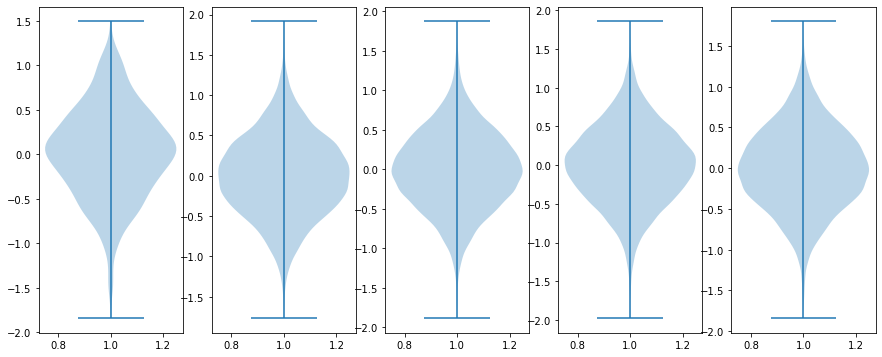

In [47]:
import matplotlib.pyplot as plt
f,a = plt.subplots(1,5,figsize = (15,6))
j = 0
for i,lay in enumerate(std05tanmodel.layers):
    if(i != 5):
        print(lay.name)
        laywts = np.ravel(lay.get_weights()[0])
        a[j].violinplot(dataset = laywts)
        j+=1 

2.1 - Glorot Normal initialization, Sigmoid activation

In [48]:
from keras.initializers import GlorotNormal
initializer = GlorotNormal()

glosigmodel = build_model(n_layers=5, input_dim=10, units=100, 
                    activation='sigmoid', initializer=initializer)
hglosig = glosigmodel.fit(X,y,batch_size=64, epochs= 1) 

16/16 [==============================] - 0s 5ms/step - loss: 0.2500 - mse: 0.2500


h1
h2
h3
h4
h5


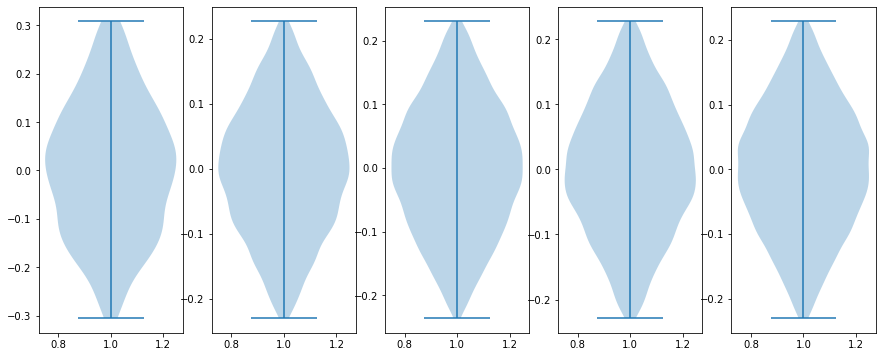

In [49]:
import matplotlib.pyplot as plt
f,a = plt.subplots(1,5,figsize = (15,6))
j = 0
for i,lay in enumerate(glosigmodel.layers):
    if(i != 5):
        print(lay.name)
        laywts = np.ravel(lay.get_weights()[0])
        a[j].violinplot(dataset = laywts)
        j+=1 

2.1 - Glorot Normal initialization, Relu activation

In [50]:
initializer = GlorotNormal()

glorelmodel = build_model(n_layers=5, input_dim=10, units=100, 
                    activation='relu', initializer=initializer)
hglorel = glorelmodel.fit(X,y,batch_size=64, epochs= 1) 

16/16 [==============================] - 1s 7ms/step - loss: 0.2872 - mse: 0.2872


h1
h2
h3
h4
h5


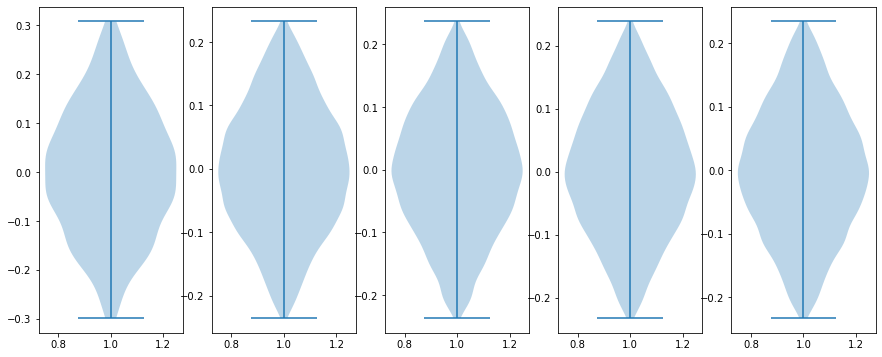

In [51]:
import matplotlib.pyplot as plt
f,a = plt.subplots(1,5,figsize = (15,6))
j = 0
for i,lay in enumerate(glorelmodel.layers):
    if(i != 5):
        print(lay.name)
        laywts = np.ravel(lay.get_weights()[0])
        a[j].violinplot(dataset = laywts)
        j+=1 

2.1 - He Normal initialization, Relu activation

In [52]:
initializer = HeNormal()

herelmodel = build_model(n_layers=5, input_dim=10, units=100, 
                    activation='relu', initializer=initializer)
hherel = herelmodel.fit(X,y,batch_size=64, epochs= 1)

16/16 [==============================] - 0s 5ms/step - loss: 0.5777 - mse: 0.5777


h1
h2
h3
h4
h5


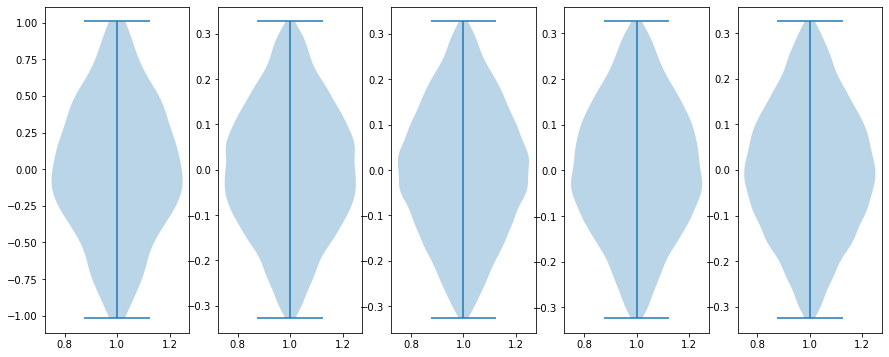

In [53]:
import matplotlib.pyplot as plt
f,a = plt.subplots(1,5,figsize = (15,6))
j = 0
for i,lay in enumerate(herelmodel.layers):
    if(i != 5):
        print(lay.name)
        laywts = np.ravel(lay.get_weights()[0])
        a[j].violinplot(dataset = laywts)
        j+=1 

Due to dependency issues with deepreplay, I contacted the TA, who has informed me that violin plots of weights are enough for 2.1. Please consider my solution. 
From the above plots, we can see that Glorot normal violin plot differs from standard plot which suffers from vanishing gradient, hence, glort normal initialization helps with vanishing gradient problem. 
Also, He Normal initialization is better for relu activation than Glorot Normal, upon glancing at the intermediate activation values

In [248]:
#Q2.2 and 2.3

import numpy as np
from keras.initializers import normal

from keras.models import Sequential
from keras.layers import Dense, LeakyReLU

def build_model(n_layers, input_dim, units, activation, initializer):
    if isinstance(units, list):
        assert len(units) == n_layers
    else:
        units = [units] * n_layers
        
    model = Sequential()
    # Adds first hidden layer with input_dim parameter
    model.add(Dense(units=units[0], 
                    input_dim=input_dim, 
                    activation=activation,
                    kernel_initializer=initializer, 
                    name='h1'))
    
    # Adds remaining hidden layers
    for i in range(2, n_layers + 1):
        model.add(Dense(units=units[i-1], 
                        activation=activation, 
                        kernel_initializer=initializer, 
                        name='h{}'.format(i)))
    
    # Adds output layer
    model.add(Dense(units=1, activation=activation, name='o',kernel_initializer=initializer))
    # Compiles the model
    model.compile(loss='mse', optimizer='sgd', metrics=['mse'])
    return model


In [249]:
initializer1 = normal(mean=0, stddev=0.05, seed=13)
initializer2 = HeNormal()

model = build_model(n_layers=10, input_dim=1, units=2, 
                    activation='relu', initializer=initializer1)

hemodel = build_model(n_layers=10, input_dim=1, units=2, 
                    activation='relu', initializer=initializer2)

lrmodel = build_model(n_layers=10, input_dim=1, units=2, 
                    activation=LeakyReLU(alpha=0.01),initializer=initializer1)

helrmodel = build_model(n_layers=10, input_dim=1, units=2, 
                    activation=LeakyReLU(alpha=0.01),initializer=initializer2)


In [250]:
x = np.random.uniform(-np.sqrt(7),np.sqrt(7),3000)
x
y = np.abs(x)
MBTCH= 64
print(x.shape)
#x = np.reshape(x, (x.shape[0], x.shape[1], 1))


(3000,)


In [251]:

history = model.fit(
        x,
        y,
        batch_size=MBTCH,
        epochs=10
        # We pass some validation for
        # monitoring validation loss and metrics
        # at the end of each epoch
    )

lrhistory = lrmodel.fit(
        x,
        y,
        batch_size=MBTCH,
        epochs=10
        # We pass some validation for
        # monitoring validation loss and metrics
        # at the end of each epoch
    )
lrhistory.history


Epoch 1/10
47/47 [==============================] - 4s 7ms/step - loss: 2.3119 - mse: 2.3119
Epoch 2/10
47/47 [==============================] - 0s 4ms/step - loss: 2.3119 - mse: 2.3119
Epoch 3/10
47/47 [==============================] - 0s 4ms/step - loss: 2.3119 - mse: 2.3119
Epoch 4/10
47/47 [==============================] - 0s 4ms/step - loss: 2.3119 - mse: 2.3119
Epoch 5/10
47/47 [==============================] - 0s 4ms/step - loss: 2.3119 - mse: 2.3119
Epoch 6/10
47/47 [==============================] - 0s 4ms/step - loss: 2.3119 - mse: 2.3119
Epoch 7/10
47/47 [==============================] - 0s 5ms/step - loss: 2.3119 - mse: 2.3119
Epoch 8/10
47/47 [==============================] - 0s 6ms/step - loss: 2.3119 - mse: 2.3119
Epoch 9/10
47/47 [==============================] - 0s 4ms/step - loss: 2.3119 - mse: 2.3119
Epoch 10/10
47/47 [==============================] - 0s 5ms/step - loss: 2.3119 - mse: 2.3119
Epoch 1/10
47/47 [==============================] - 1s 4ms/step - los

{'loss': [1.4053865671157837,
  0.7055159211158752,
  0.6030091047286987,
  0.5883452892303467,
  0.5861438512802124,
  0.5858127474784851,
  0.5857515335083008,
  0.5857681632041931,
  0.5857293009757996,
  0.5857592225074768],
 'mse': [1.4053865671157837,
  0.7055159211158752,
  0.6030091047286987,
  0.5883452892303467,
  0.5861438512802124,
  0.5858127474784851,
  0.5857515335083008,
  0.5857681632041931,
  0.5857293009757996,
  0.5857592225074768]}

In [86]:
# 2.2 - He Normal, Relu. Outputs are hidden

hect = 0
for i in range(1000):
    x = np.random.uniform(-np.sqrt(7),np.sqrt(7),3000)
    y = np.abs(x)
    hehistory = hemodel.fit(
        x,
        y,
        batch_size=MBTCH,
        epochs=3
        # We pass some validation for
        # monitoring validation loss and metrics
        # at the end of each epoch
    )
    if(hehistory.history["loss"][-1] != hehistory.history["loss"][0]):
        hect += 1
        print(i,hect)
print(hect /1000)
    


Epoch 1/3
47/47 [==============================] - 0s 8ms/step - loss: 2.3563 - mse: 2.3563
Epoch 2/3
47/47 [==============================] - 0s 8ms/step - loss: 2.3563 - mse: 2.3563
Epoch 3/3
47/47 [==============================] - 0s 9ms/step - loss: 2.3563 - mse: 2.3563
0 1
Epoch 1/3
47/47 [==============================] - 0s 8ms/step - loss: 2.3150 - mse: 2.3150
Epoch 2/3
47/47 [==============================] - 0s 8ms/step - loss: 2.3150 - mse: 2.3150
Epoch 3/3
47/47 [==============================] - 0s 9ms/step - loss: 2.3150 - mse: 2.3150
Epoch 1/3
47/47 [==============================] - 1s 12ms/step - loss: 2.3664 - mse: 2.3664
Epoch 2/3
47/47 [==============================] - 0s 10ms/step - loss: 2.3664 - mse: 2.3664
Epoch 3/3
47/47 [==============================] - 0s 6ms/step - loss: 2.3664 - mse: 2.3664
Epoch 1/3
47/47 [==============================] - 0s 6ms/step - loss: 2.3525 - mse: 2.3525
Epoch 2/3
47/47 [==============================] - 0s 6ms/step - loss: 2.3

In [87]:
print(hect / 1000)



0.689


This shows that 31% of 1000 simulations suffers from NN collapse. This is closer to the 40% number in Lu et al for random initalization, but it is not close to the 90% number quoted for He initialization. This number is misleading, as the remaining 69% of simulations differ in loss value by 10^-6 or lesser, showing that infinitesimal level of training occurs, this is pretty much the same as the vanishing gradient problem. So we can say that nearly 100% of the simulations do suffer from NN collapse.

In [88]:
# 2.3 - Leaky relu, He Normal. Outputs are hidden
helrct = 0
for i in range(1000):
    x = np.random.uniform(-np.sqrt(7),np.sqrt(7),3000)
    y = np.abs(x)
    helrhistory = helrmodel.fit(
        x,
        y,
        batch_size=MBTCH,
        epochs=3,
        # We pass some validation for
        # monitoring validation loss and metrics
        # at the end of each epoch
    )
    if(helrhistory.history["loss"][-1] != helrhistory.history["loss"][0]):
        helrct += 1
        print(i,helrct)
print(helrct /1000)
    

Epoch 1/3
47/47 [==============================] - 1s 5ms/step - loss: 2.2589 - mse: 2.2589
Epoch 2/3
47/47 [==============================] - 0s 5ms/step - loss: 2.1385 - mse: 2.1385
Epoch 3/3
47/47 [==============================] - 0s 5ms/step - loss: 2.0241 - mse: 2.0241
0 1
Epoch 1/3
47/47 [==============================] - 0s 5ms/step - loss: 1.8922 - mse: 1.8922
Epoch 2/3
47/47 [==============================] - 0s 5ms/step - loss: 1.7867 - mse: 1.7867
Epoch 3/3
47/47 [==============================] - 0s 5ms/step - loss: 1.6863 - mse: 1.6863
1 2
Epoch 1/3
47/47 [==============================] - 0s 5ms/step - loss: 1.6162 - mse: 1.6162
Epoch 2/3
47/47 [==============================] - 0s 5ms/step - loss: 1.5233 - mse: 1.5233
Epoch 3/3
47/47 [==============================] - 0s 5ms/step - loss: 1.4346 - mse: 1.4346
2 3
Epoch 1/3
47/47 [==============================] - 0s 5ms/step - loss: 1.3643 - mse: 1.3643
Epoch 2/3
47/47 [==============================] - 0s 5ms/step - los

In [89]:
print(helrct /1000)

1.0


For leaky relu, every simulation undergoes training, and hence 100% of the cases avoid vanishing gradient problem. It helps in avoiding vanishing gradient problem.

## Question 3

3a) Coadaptation is the mixing of the working of different units in a neural network, leading to better performance. It can also lead to overfitting, which is prevented by using dropout.

In a neural network, each layer's units change during Neural network training due to the parameters changing in previous layers. This slows down the training by requiring lower learning rates and careful parameter initialization, and makes it hard to train models with persisting nonlinearities. We refer to this phenomenon as internal covariate shift, and address the problem by normalizing layer inputs using Batch Normalization.


Answer to rest of question 3 after q3 code

In [1]:
#3b
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [2]:
(train_x, train_y), (test_x, test_y) = keras.datasets.mnist.load_data()
train_x = train_x / 255.0
test_x = test_x / 255.0
train_x = tf.expand_dims(train_x, 3)
test_x = tf.expand_dims(test_x, 3)
val_x = train_x[:12000]
val_y = train_y[:12000]
train_x = train_x[12000:]
train_y = train_y[12000:]

In [3]:
train_x.shape

TensorShape([48000, 28, 28, 1])

In [4]:
#3b Standard and Batch norm
lenet_5_model_sn_bn = keras.models.Sequential([
    keras.layers.Normalization(),
    keras.layers.Conv2D(6, kernel_size=5, strides=1,  activation='tanh', input_shape=train_x[0].shape, padding='same', ), #C1
    keras.layers.BatchNormalization(),
    keras.layers.AveragePooling2D(), #S2
    keras.layers.Conv2D(16, kernel_size=5, strides=1, activation='tanh', padding='valid'), #C3
    keras.layers.BatchNormalization(),
    keras.layers.AveragePooling2D(), #S4
    keras.layers.Flatten(), #Flatten
    keras.layers.Dense(120, activation='tanh'), #C5
    keras.layers.BatchNormalization(),
    keras.layers.Dense(84, activation='tanh'), #F6
    keras.layers.BatchNormalization(),
    keras.layers.Dense(10, activation='softmax') #Output layer
])



In [5]:
lenet_5_model_sn_bn.compile(optimizer='adam', loss=keras.losses.sparse_categorical_crossentropy, metrics=['acc'])

In [6]:
lenet_5_model_sn_bn.layers[-1].get_weights()

[]

In [7]:
lenet_5_model_sn_bn.fit(train_x, train_y, epochs=5, validation_data=(val_x, val_y))

Epoch 1/5
1500/1500 [==============================] - 89s 33ms/step - loss: 0.1942 - acc: 0.9414 - val_loss: 0.1032 - val_acc: 0.9680
Epoch 2/5
1500/1500 [==============================] - 16s 11ms/step - loss: 0.0845 - acc: 0.9728 - val_loss: 0.0764 - val_acc: 0.9750
Epoch 3/5
1500/1500 [==============================] - 16s 11ms/step - loss: 0.0604 - acc: 0.9813 - val_loss: 0.0660 - val_acc: 0.9799
Epoch 4/5
1500/1500 [==============================] - 16s 11ms/step - loss: 0.0498 - acc: 0.9846 - val_loss: 0.0594 - val_acc: 0.9822
Epoch 5/5
1500/1500 [==============================] - 17s 11ms/step - loss: 0.0400 - acc: 0.9875 - val_loss: 0.0573 - val_acc: 0.9833


weights of layers given below

In [8]:
lenet_5_model_sn_bn.layers[0].get_weights()

[array([0.], dtype=float32), array([1.], dtype=float32), 0]

In [9]:
lenet_5_model_sn_bn.layers[2].get_weights()

[array([1.275247 , 1.2323979, 1.1746174, 0.8905345, 1.1162131, 1.1177425],
       dtype=float32),
 array([ 0.11695792, -0.45706916, -0.42906952, -0.3925981 , -0.04857609,
         0.4216107 ], dtype=float32),
 array([ 0.08564265, -0.1392861 , -0.5291801 , -0.32679832,  0.05571316,
         0.22487906], dtype=float32),
 array([0.03560432, 0.0541686 , 0.02749996, 0.03496159, 0.02207305,
        0.07475843], dtype=float32)]

In [10]:
lenet_5_model_sn_bn.layers[5].get_weights()

[array([0.8801575 , 0.86833906, 0.8175071 , 0.8544223 , 1.1026298 ,
        1.2321532 , 1.1631061 , 0.94974744, 0.99985653, 0.96085346,
        0.97550297, 1.1036284 , 0.9018012 , 0.8421124 , 1.0442445 ,
        0.9272961 ], dtype=float32),
 array([-0.00414771,  0.03578762, -0.01867935,  0.07212709, -0.19928117,
         0.16544391, -0.04814046, -0.04869662,  0.01370634,  0.13322891,
         0.02379768,  0.03358854,  0.01158737,  0.00948477,  0.10132556,
        -0.05741221], dtype=float32),
 array([ 0.37271103, -0.10950624,  0.13225582, -0.46381035,  0.35127732,
        -0.7228914 , -0.60842496,  0.1019724 ,  0.64656276, -0.6220163 ,
        -0.6335286 , -0.55601877, -0.1686051 , -0.09577469, -0.380359  ,
         0.06018896], dtype=float32),
 array([0.62701577, 0.6943064 , 0.706325  , 0.47172412, 0.59189785,
        0.2711475 , 0.35338494, 0.7267392 , 0.34477746, 0.41861284,
        0.33267623, 0.3959182 , 0.6371929 , 0.7185415 , 0.6197427 ,
        0.7096153 ], dtype=float32)]

In [11]:
lenet_5_model_sn_bn.layers[9].get_weights()

[array([1.0123379 , 1.032169  , 0.94092107, 0.86363035, 1.0367428 ,
        0.91756487, 0.89059407, 0.91091067, 0.9027203 , 0.90390056,
        0.8759956 , 1.0306038 , 0.97122484, 0.9903748 , 0.86887133,
        0.93475246, 1.0803591 , 1.0650917 , 1.0203502 , 0.97593194,
        0.954446  , 1.1693543 , 0.9190993 , 0.95781374, 0.8397154 ,
        1.0136037 , 0.94403577, 1.0168356 , 1.074441  , 0.9549764 ,
        0.9774085 , 1.168483  , 0.91113675, 0.9763877 , 1.14295   ,
        1.1681187 , 1.0188767 , 0.9148871 , 0.9202798 , 0.9810999 ,
        1.0192033 , 1.0376289 , 0.95385337, 1.0075217 , 1.0490344 ,
        1.0279313 , 0.9870775 , 1.0890954 , 0.93069077, 1.0294821 ,
        0.9401076 , 1.1396272 , 0.9194751 , 1.0014588 , 0.9635404 ,
        0.82495093, 1.0052569 , 1.0226309 , 1.0181555 , 0.9833509 ,
        1.0692879 , 0.972828  , 0.9656855 , 0.9838792 , 0.91457134,
        1.0585387 , 0.9975415 , 1.0506353 , 1.0541072 , 0.83348024,
        1.0563365 , 1.0552781 , 1.0959845 , 0.93

In [12]:
lenet_5_model_sn_bn.layers[11].get_weights()

[array([1.0805068 , 1.186597  , 1.1406629 , 1.1092615 , 1.1755204 ,
        1.0904015 , 1.0469329 , 0.9666933 , 1.062493  , 0.95664436,
        1.0633873 , 1.1270814 , 1.0941925 , 1.1474103 , 0.9748419 ,
        1.0898768 , 1.0936425 , 1.0982555 , 1.120673  , 1.0956475 ,
        1.0538368 , 1.0662817 , 1.1115438 , 1.08662   , 1.1594976 ,
        1.126892  , 1.1419598 , 1.1708041 , 1.1208581 , 1.0539093 ,
        1.2318863 , 1.0186356 , 1.1106851 , 1.1682459 , 1.0414836 ,
        1.1103753 , 1.0459573 , 1.1629571 , 1.2181263 , 1.1832572 ,
        1.0604235 , 1.0225046 , 1.0147305 , 1.1181645 , 1.1514891 ,
        1.0489447 , 1.0663811 , 1.0501288 , 1.0105174 , 1.0365262 ,
        1.1179366 , 1.2004985 , 1.1668261 , 1.1065235 , 1.1275508 ,
        1.0785788 , 1.0089521 , 1.0872129 , 1.0807531 , 1.2332181 ,
        1.0141673 , 1.0882134 , 1.1448029 , 1.0570906 , 1.2352554 ,
        1.1165125 , 1.0404845 , 1.0767971 , 1.0076603 , 1.0033131 ,
        1.133368  , 1.1136334 , 1.0595386 , 1.15

In [13]:
#Test error
lenet_5_model_sn_bn.evaluate(test_x, test_y)


313/313 [==============================] - 3s 7ms/step - loss: 0.0424 - acc: 0.9857


[0.04236229509115219, 0.9857000112533569]

In [14]:
#3c - Batch norm

lenet_5_model_bn = keras.models.Sequential([
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(6, kernel_size=5, strides=1,  activation='tanh', input_shape=train_x[0].shape, padding='same', ), #C1
    keras.layers.BatchNormalization(),
    keras.layers.AveragePooling2D(), #S2
    keras.layers.Conv2D(16, kernel_size=5, strides=1, activation='tanh', padding='valid'), #C3
    keras.layers.BatchNormalization(),
    keras.layers.AveragePooling2D(), #S4
    keras.layers.Flatten(), #Flatten
    keras.layers.Dense(120, activation='tanh'), #C5
    keras.layers.BatchNormalization(),
    keras.layers.Dense(84, activation='tanh'), #F6
    keras.layers.BatchNormalization(),
    keras.layers.Dense(10, activation='softmax') #Output layer
])


In [15]:
lenet_5_model_bn.compile(optimizer='adam', loss=keras.losses.sparse_categorical_crossentropy, metrics=['acc'])

In [16]:
lenet_5_model_bn.fit(train_x, train_y, epochs=5, validation_data=(val_x, val_y))

Epoch 1/5
1500/1500 [==============================] - 21s 12ms/step - loss: 0.1769 - acc: 0.9477 - val_loss: 0.1014 - val_acc: 0.9697
Epoch 2/5
1500/1500 [==============================] - 14s 10ms/step - loss: 0.0729 - acc: 0.9779 - val_loss: 0.0622 - val_acc: 0.9816
Epoch 3/5
1500/1500 [==============================] - 16s 11ms/step - loss: 0.0555 - acc: 0.9826 - val_loss: 0.0616 - val_acc: 0.9806
Epoch 4/5
1500/1500 [==============================] - 17s 11ms/step - loss: 0.0455 - acc: 0.9852 - val_loss: 0.0661 - val_acc: 0.9806
Epoch 5/5
1500/1500 [==============================] - 17s 11ms/step - loss: 0.0361 - acc: 0.9881 - val_loss: 0.0589 - val_acc: 0.9827


In [23]:
lenet_5_model_bn.layers[0].get_weights()

[array([1.4482279], dtype=float32),
 array([0.65161645], dtype=float32),
 array([0.1312541], dtype=float32),
 array([0.09523014], dtype=float32)]

In [18]:
lenet_5_model_bn.layers[2].get_weights()

[array([1.1149596 , 1.227264  , 1.1371644 , 0.8389182 , 1.0899053 ,
        0.96013737], dtype=float32),
 array([ 0.3000066 ,  0.09810828,  0.1551785 , -0.0588173 ,  0.06969466,
        -0.03976428], dtype=float32),
 array([ 0.34006977,  0.49766785,  0.35846484, -0.07636584,  0.21861842,
         0.04154499], dtype=float32),
 array([0.201719  , 0.13540344, 0.19367726, 0.15183482, 0.1887151 ,
        0.23642318], dtype=float32)]

In [19]:
lenet_5_model_bn.layers[5].get_weights()

[array([0.982234  , 0.9709786 , 1.1405288 , 0.9344933 , 1.0032821 ,
        0.9928215 , 0.98978436, 0.9463586 , 0.92145824, 1.1932875 ,
        1.1117507 , 0.93438405, 0.64729905, 0.94823796, 1.034806  ,
        0.8353954 ], dtype=float32),
 array([ 0.03558289, -0.02339516,  0.00648517,  0.01169907, -0.0265724 ,
        -0.04017899,  0.05084086, -0.12656301, -0.0026441 , -0.02367602,
         0.00251091,  0.03494458,  0.02007277, -0.01226386, -0.06960155,
         0.0041988 ], dtype=float32),
 array([-2.61593282e-01,  1.98743701e-01, -1.14636846e-01,  3.25845361e-01,
         4.83969525e-02,  2.46548593e-01, -6.65823996e-01,  2.21123889e-01,
         8.57784227e-02,  5.87186277e-01,  2.19101924e-02, -1.70491576e-01,
        -3.11371744e-01,  5.76441176e-04, -1.70654103e-01, -3.75983685e-01],
       dtype=float32),
 array([0.51566106, 0.48757043, 0.5377966 , 0.5083074 , 0.64095575,
        0.69344914, 0.30688637, 0.5730919 , 0.5934117 , 0.35009038,
        0.6956037 , 0.55901337, 0.5243

In [20]:
lenet_5_model_bn.layers[9].get_weights()

[array([1.0580229 , 0.9451321 , 0.98636013, 0.9792361 , 0.9938135 ,
        1.0308065 , 1.0234535 , 0.9629293 , 1.0124614 , 0.9901441 ,
        1.0516925 , 0.93451357, 0.9602937 , 1.0643027 , 1.01192   ,
        1.024965  , 1.0195336 , 0.8748795 , 0.8313185 , 1.0826735 ,
        0.8580294 , 1.0716166 , 1.0453972 , 0.94141716, 0.99676615,
        0.97526085, 1.0119243 , 0.9951883 , 1.0322298 , 1.0448291 ,
        0.93846005, 0.967859  , 0.9670587 , 1.0063869 , 1.0134225 ,
        0.9945602 , 1.120477  , 0.9443988 , 0.9552862 , 1.0091445 ,
        1.0428509 , 1.0627831 , 0.9138817 , 0.9858202 , 0.95670193,
        0.9401395 , 0.94640213, 0.9875633 , 1.0249901 , 0.9399983 ,
        0.9451205 , 1.0392938 , 0.93096346, 0.9803033 , 1.0643    ,
        0.98666936, 1.0283319 , 0.9390747 , 1.0534534 , 0.99799687,
        1.0062873 , 1.0226185 , 1.036593  , 0.9447454 , 1.0289667 ,
        1.0881149 , 1.0276469 , 0.9218293 , 0.9115129 , 0.84797674,
        1.082389  , 1.0651109 , 0.9993634 , 0.82

In [21]:
lenet_5_model_bn.layers[11].get_weights()

[array([1.1551952 , 1.0827308 , 1.0884415 , 1.0630937 , 1.0504968 ,
        1.1656263 , 1.1459078 , 1.0612837 , 1.0784491 , 1.1104974 ,
        1.121658  , 1.1329805 , 0.96659654, 1.0075027 , 1.1092921 ,
        1.1243806 , 1.1714269 , 1.1587101 , 1.0877273 , 1.1185176 ,
        1.1696805 , 1.1085649 , 1.0478413 , 1.2819203 , 1.1465774 ,
        1.0946751 , 1.1308198 , 1.1350642 , 1.1145732 , 1.0683074 ,
        0.98749864, 1.0250523 , 1.0509437 , 1.0915809 , 1.1637503 ,
        1.0964601 , 0.9701489 , 0.9879976 , 1.0873705 , 0.93741757,
        1.0600448 , 1.1305541 , 1.0546551 , 1.1566856 , 1.0081632 ,
        1.0783441 , 1.0534712 , 1.1786374 , 1.058617  , 0.9568642 ,
        1.0668616 , 1.2048033 , 1.0204844 , 1.1586126 , 1.0907103 ,
        1.1545423 , 1.0547494 , 1.1604148 , 1.0160692 , 1.1079296 ,
        1.0502445 , 1.0530778 , 1.0748171 , 1.0161337 , 1.0636146 ,
        1.1127896 , 1.1504152 , 1.087013  , 1.0437398 , 1.1355268 ,
        1.0444235 , 1.1575689 , 1.0798231 , 1.07

In [22]:
lenet_5_model_bn.evaluate(test_x, test_y)


313/313 [==============================] - 2s 6ms/step - loss: 0.0457 - acc: 0.9851


[0.045707277953624725, 0.9850999712944031]

batch_normalization_4
batch_normalization_5
batch_normalization_6
batch_normalization_7
batch_normalization_8


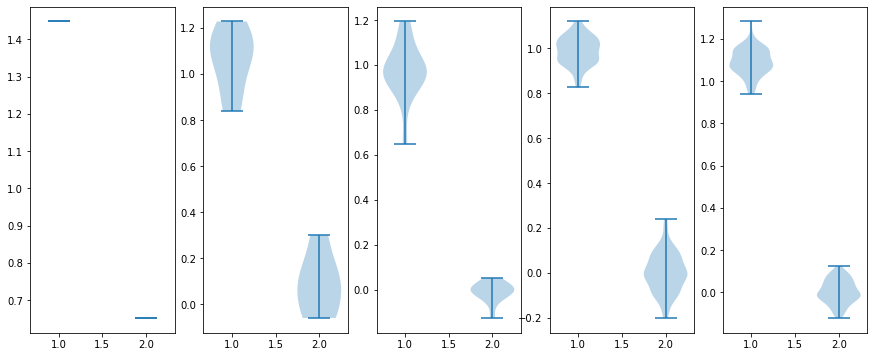

In [24]:
#3C - Violin plot of Batch norm weights - beta and gamma
import matplotlib.pyplot as plt
f,a = plt.subplots(1,5,figsize = (15,6))
j = 0
for i,lay in enumerate(lenet_5_model_bn.layers):
    if(i in [0,2,5,9,11]):
        print(lay.name)
        #print(lay.get_weights())
        a[j].violinplot(dataset = lay.get_weights()[:2])
        j+=1 


In [25]:
#3d - Dropout
lenet_5_model_dp = keras.models.Sequential([
    keras.layers.Dropout(0.2),
    keras.layers.Conv2D(6, kernel_size=5, strides=1,  activation='tanh', input_shape=train_x[0].shape, padding='same', ), #C1
    keras.layers.Dropout(0.5),
    keras.layers.AveragePooling2D(), #S2
    keras.layers.Conv2D(16, kernel_size=5, strides=1, activation='tanh', padding='valid'), #C3
    keras.layers.Dropout(0.5),
    keras.layers.AveragePooling2D(), #S4
    keras.layers.Flatten(), #Flatten
    keras.layers.Dense(120, activation='tanh'), #C5
    keras.layers.Dropout(0.5),
    keras.layers.Dense(84, activation='tanh'), #F6
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation='softmax') #Output layer
])


In [26]:
lenet_5_model_dp.compile(optimizer='adam', loss=keras.losses.sparse_categorical_crossentropy, metrics=['acc'])

In [27]:
lenet_5_model_dp.fit(train_x, train_y, epochs=5, validation_data=(val_x, val_y))

Epoch 1/5
1500/1500 [==============================] - 10s 6ms/step - loss: 0.6402 - acc: 0.7989 - val_loss: 0.2554 - val_acc: 0.9244
Epoch 2/5
1500/1500 [==============================] - 14s 9ms/step - loss: 0.4012 - acc: 0.8797 - val_loss: 0.1895 - val_acc: 0.9405
Epoch 3/5
1500/1500 [==============================] - 13s 9ms/step - loss: 0.3275 - acc: 0.9038 - val_loss: 0.1369 - val_acc: 0.9575
Epoch 4/5
1500/1500 [==============================] - 14s 9ms/step - loss: 0.2731 - acc: 0.9197 - val_loss: 0.1157 - val_acc: 0.9664
Epoch 5/5
1500/1500 [==============================] - 14s 9ms/step - loss: 0.2421 - acc: 0.9286 - val_loss: 0.1037 - val_acc: 0.9714


In [28]:
# Test error
lenet_5_model_dp.evaluate(test_x, test_y)


313/313 [==============================] - 2s 6ms/step - loss: 0.0899 - acc: 0.9726


[0.08993283659219742, 0.972599983215332]

In [29]:
#3e - Batch norm and dropout
lenet_5_model_bn_dp = keras.models.Sequential([
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.2),
    keras.layers.Conv2D(6, kernel_size=5, strides=1,  activation='tanh', input_shape=train_x[0].shape, padding='same', ), #C1
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.5),
    keras.layers.AveragePooling2D(), #S2
    keras.layers.Conv2D(16, kernel_size=5, strides=1, activation='tanh', padding='valid'), #C3
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.5),
    keras.layers.AveragePooling2D(), #S4
    keras.layers.Flatten(), #Flatten
    keras.layers.Dense(120, activation='tanh'), #C5
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(84, activation='tanh'), #F6
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation='softmax') #Output layer
])

In [30]:
lenet_5_model_bn_dp.compile(optimizer='adam', loss=keras.losses.sparse_categorical_crossentropy, metrics=['acc'])

In [31]:
lenet_5_model_bn_dp.fit(train_x, train_y, epochs=5, validation_data=(val_x, val_y))

Epoch 1/5
1500/1500 [==============================] - 21s 13ms/step - loss: 0.6954 - acc: 0.7809 - val_loss: 0.2206 - val_acc: 0.9339
Epoch 2/5
1500/1500 [==============================] - 18s 12ms/step - loss: 0.3489 - acc: 0.8956 - val_loss: 0.1247 - val_acc: 0.9634
Epoch 3/5
1500/1500 [==============================] - 18s 12ms/step - loss: 0.2689 - acc: 0.9221 - val_loss: 0.1134 - val_acc: 0.9672
Epoch 4/5
1500/1500 [==============================] - 19s 13ms/step - loss: 0.2311 - acc: 0.9328 - val_loss: 0.1058 - val_acc: 0.9701
Epoch 5/5
1500/1500 [==============================] - 20s 14ms/step - loss: 0.2096 - acc: 0.9390 - val_loss: 0.0918 - val_acc: 0.9747


In [32]:
# Test error
lenet_5_model_bn_dp.evaluate(test_x, test_y)


313/313 [==============================] - 2s 6ms/step - loss: 0.0781 - acc: 0.9771


[0.07811868190765381, 0.9771000146865845]

3b) Parameters for each layer are in hidden outputs after 3b code

3c) Plot given above. Train accuracy is very slightly higher for standard norm + batch norm, when compared to batch norm only. Test accuracy is also very slightly higher for standard norm + batch norm, when compared to batch norm only. Full batch norm did not better the performance of standard norm + batch norm.

3d) Test accuracy of dropout is lower than for standard norm + batch norm. It is also lower when compared to batch norm alone. 

3e) Test accuracy of batch norm + dropout is higher than dropout's test accuracy. Test accuracy for batch norm + dropout is lower than batch norm's test accuracy alone.

## Question 4

In [ ]:
# Run on Greene.

import math
from sklearn.model_selection import train_test_split
import numpy as np
from keras import backend as K
from keras.layers import Dense, BatchNormalization
from keras.models import Sequential
import math
#import tensorflow as tf
import torch
import time
from time import time

device = ("cuda" if torch.cuda.is_available() else "cpu")

def func(x1, x2):
  A = -(x2+47)*math.sin(math.sqrt(math.fabs((x1/2) + (x2+47))))
  B = -x1*math.sin(math.sqrt(math.fabs(x1-(x2+47))))
  return A + B

def make_dataset():
  samples = np.random.normal(0, 0.3, 100000)
  xs = (np.random.rand(100000,2) - 0.5)*2*512
  f = []

  for i in range(len(xs)):
    temp = func(xs[i][0], xs[i][1])
    f.append(temp)

  f = np.array(f)
  y = f + samples

  x_train, x_test, y_train, y_test = train_test_split(xs, y, test_size=0.2)

  x_train = x_train.reshape(80000, 2, 1)
  x_test = x_test.reshape(20000, 2, 1)

  return x_train, x_test, y_train, y_test

def rmse(y_true, y_pred):
  return K.sqrt(K.mean(K.square(y_pred - y_true), axis=-1))


layer3times = []
file = open("3layers.txt", 'w')
x_train, x_test, y_train, y_test = make_dataset()
for ele in [16,32,64,128]:
    model = Sequential()
    model.add(Dense(ele, input_dim = 2, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(2*ele, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(ele, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(1, activation='linear'))
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=[rmse])
    start = time()
    model.summary()
    save_history = model.fit(x_train, y_train, epochs=1500, batch_size=32, validation_split=0.2)
    end = time()-start
    layer3times.append(end)
    mse, rms = model.evaluate(x_test, y_test)
    print("Metrics for ", ele, " units hidden layer are: ",str(rms))
    print("\n Time taken to fit is",end)
    file.write(str(rms))
    file.write("\n")

file.close()

# The same process is repeated twice for one layer and 2 layer networks. Outputs and plots in next cells.

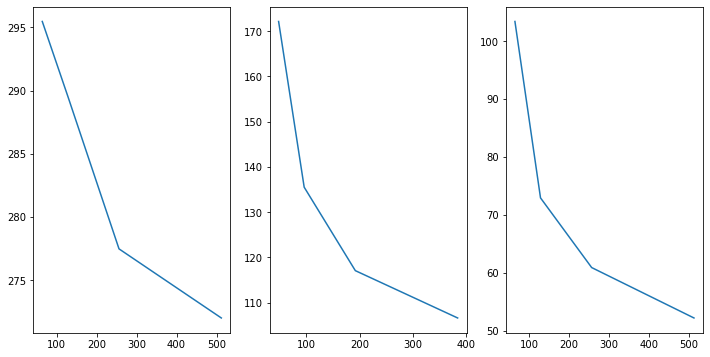

In [717]:
layer1losses = [295.4651
,289.5362
,277.4649
,271.9951
]
layer2losses = [172.1656,135.5158, 117.0614, 106.596]
layer3losses = [103.3671,72.9039,60.8726,52.1679]

# Plot of rmse in y axis vs Total no of hidden units 
f,a = plt.subplots(1,3,figsize=(12,6))

a[0].plot([64,128,256,512],layer1losses)
a[1].plot([48,96,192,384], layer2losses)
a[2].plot([64,128,256,512],layer3losses)

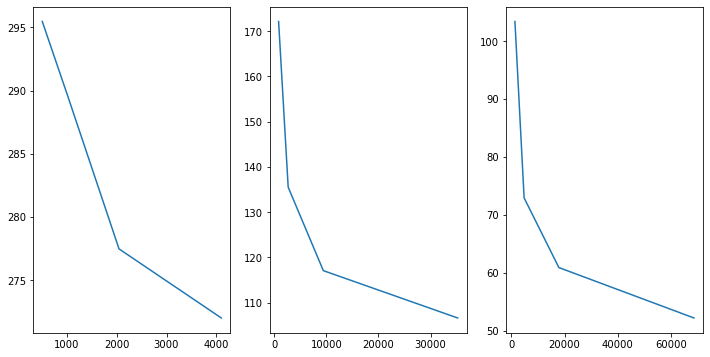

In [730]:
l3params = [1393,4833,17857, 68481]
l2params = [817, 2657, 9409, 35201]
l1params = [513,1025,2049,4097]
# Plot of rmse in y axis vs Total no of parameters
f,a = plt.subplots(1,3,figsize=(12,6))

a[0].plot(l1params, layer1losses)
a[1].plot(l2params, layer2losses)
a[2].plot(l3params,layer3losses)

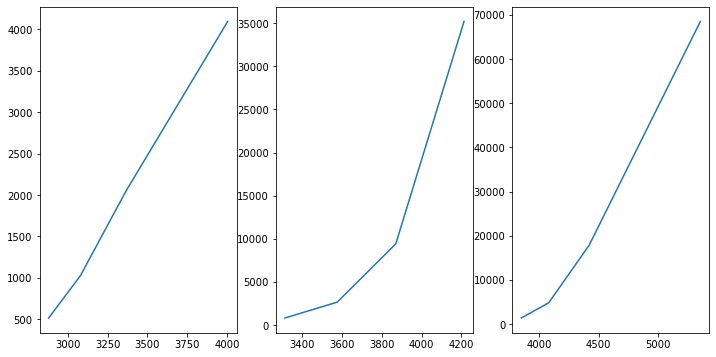

In [732]:
#4.2 Time

l1times = [2879.3174, 3079.2611, 3365.7504, 4004.1831]
l2times = [3314.5651, 3576.7812, 3870.2925, 4212.6780]
l3times = [3849.4770,4080.0019,4420.7999,5356.9798]

# Plot of training time in y axis vs Total no of parameters
f,a = plt.subplots(1,3,figsize=(12,6))

a[0].plot(l1times,l1params)
a[1].plot(l2times, l2params)
a[2].plot(l3times,l3params)

## Question 5

In [97]:
'''
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras.losses import sparse_categorical_crossentropy
from keras.optimizers import Adam
import matplotlib.pyplot as plt
from CLR.clr_callback import CyclicLR
from LRF.lr_finder import LRFinder

# Model configuration
batch_size = 50
img_width, img_height, img_num_channels = 28, 28, 1
loss_function = sparse_categorical_crossentropy
no_classes = 10
no_epochs = 15
optimizer = Adam()
validation_split = 0.2
verbosity = 1

# Load CIFAR-100 data
(input_train, target_train), (input_test, target_test) = mnist.load_data()

# Determine shape of the data
input_shape = (img_width, img_height, img_num_channels)

# Parse numbers as floats
input_train = input_train.astype('float32').reshape((input_train.shape[0], img_width, img_height, img_num_channels))
input_test = input_test.astype('float32').reshape((input_test.shape[0], img_width, img_height, img_num_channels))

# Normalize data
input_train = input_train / 255
input_test = input_test / 255

# Create the model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(no_classes, activation='softmax'))
'''

"\nfrom keras.datasets import mnist\nfrom keras.models import Sequential\nfrom keras.layers import Dense, Flatten, Conv2D, MaxPooling2D\nfrom keras.losses import sparse_categorical_crossentropy\nfrom keras.optimizers import Adam\nimport matplotlib.pyplot as plt\nfrom CLR.clr_callback import CyclicLR\nfrom LRF.lr_finder import LRFinder\n\n# Model configuration\nbatch_size = 50\nimg_width, img_height, img_num_channels = 28, 28, 1\nloss_function = sparse_categorical_crossentropy\nno_classes = 10\nno_epochs = 15\noptimizer = Adam()\nvalidation_split = 0.2\nverbosity = 1\n\n# Load CIFAR-100 data\n(input_train, target_train), (input_test, target_test) = mnist.load_data()\n\n# Determine shape of the data\ninput_shape = (img_width, img_height, img_num_channels)\n\n# Parse numbers as floats\ninput_train = input_train.astype('float32').reshape((input_train.shape[0], img_width, img_height, img_num_channels))\ninput_test = input_test.astype('float32').reshape((input_test.shape[0], img_width, img_h

In [98]:
'''
clr = CyclicLR(base_lr=0.000000001, max_lr=10,
                        step_size=2000.)
model.fit(X_train, Y_train, callbacks=[clr])
'''

'\nclr = CyclicLR(base_lr=0.000000001, max_lr=10,\n                        step_size=2000.)\nmodel.fit(X_train, Y_train, callbacks=[clr])\n'

In [91]:
# 5.1 - import packages
from keras.layers import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.convolutional import AveragePooling2D
from keras.layers.core import Activation
from keras.layers.core import Dense
from keras.layers.core import Dropout
from keras.layers import Flatten
from keras.layers import Input
from keras.models import Model
from keras.layers import concatenate
from keras import backend as K

In [92]:
def conv_module(x,K,kX,kY, stride, chanDim, padding="same"):
        x = Conv2D(K, (kX, kY), strides=stride, padding=padding)(x)
        x = BatchNormalization(axis=chanDim)(x)
        x = Activation("relu")(x)
        return x

def inception_module(x, numK1x1, numK3x3, chanDim):
    conv_1x1 = conv_module(x, numK1x1, 1, 1,(1, 1), chanDim)
    conv_3x3 = conv_module(x, numK3x3, 3, 3,(1, 1), chanDim)
    x = concatenate([conv_1x1, conv_3x3], axis=chanDim)
    return x

def downsample_module(x, K, chanDim):
    conv_3x3 = conv_module(x, K, 3, 3, (2, 2),-1, padding="valid")
    pool = MaxPooling2D((3, 3), strides=(2, 2))(x)
    x = concatenate([conv_3x3, pool], axis=chanDim)
    return x

def build(width, height, depth, classes):
    inputShape = (height, width, depth)
    chanDim = -1
    
    inputs = Input(shape=inputShape)
    x = conv_module(inputs, 96, 3, 3, (1, 1),chanDim)
    x = inception_module(x, 32, 32, chanDim)
    x = inception_module(x, 32, 48, chanDim)
    x = downsample_module(x, 80, chanDim)
    x = inception_module(x, 112, 48, chanDim)
    x = inception_module(x, 96, 64, chanDim)
    x = inception_module(x, 80, 80, chanDim)
    x = inception_module(x, 48, 96, chanDim)
    x = downsample_module(x, 96, chanDim)
    x = inception_module(x, 176, 160, chanDim)
    x = inception_module(x, 176, 160, chanDim)
    x = AveragePooling2D((7, 7),padding = "same")(x)
    x = Dropout(0.5)(x)
    x = Flatten()(x)
    x = Dense(classes)(x)
    x = Activation("softmax")(x)
    model = Model(inputs, x, name="googlenet")
    return model
    
from keras.metrics import categorical_accuracy,top_k_categorical_accuracy
def top_5_accuracy(y_true, y_pred):
    return top_k_categorical_accuracy(y_true, y_pred, k=5)

In [ ]:

!git clone https://github.com/WittmannF/LRFinder.git

Cloning into 'LRFinder'...


In [93]:
from keras.models import Sequential
from keras.layers import Flatten, Dense
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt

In [94]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras.losses import sparse_categorical_crossentropy
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer

In [95]:
#5.1 - Data generation

from LRFinder.keras_callback import LRFinder

batch_size = 64
img_width, img_height, img_num_channels = 28, 28, 1
loss_function = sparse_categorical_crossentropy
no_classes = 10
no_epochs = 5
# 1. Input Data
(input_train, y_train), (input_test, y_test) = fashion_mnist.load_data()
# Determine shape of the data
input_shape = (img_width, img_height, img_num_channels)

# Parse numbers as floats
input_train = input_train.astype('float32').reshape((input_train.shape[0], img_width, img_height, img_num_channels))
input_test = input_test.astype('float32').reshape((input_test.shape[0], img_width, img_height, img_num_channels))

# Normalize data
input_train = input_train / 255
input_test = input_test / 255



In [ ]:
# Define and compile model
model = build(28,28,1,10)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc',top_5_accuracy])
model.summary()

Model: "googlenet"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 conv2d_19 (Conv2D)             (None, 28, 28, 96)   960         ['input_2[0][0]']                
                                                                                                  
 batch_normalization_19 (BatchN  (None, 28, 28, 96)  384         ['conv2d_19[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_20 (Activation)     (None, 28, 28, 96)   0           ['batch_normalization_19[

Epoch 1/5
938/938 [==============================] - 128s 92ms/step - loss: 2.6118 - acc: 0.1011 - top_5_accuracy: 0.9488
Epoch 2/5
938/938 [==============================] - 87s 92ms/step - loss: 2.6072 - acc: 0.1001 - top_5_accuracy: 0.9481
Epoch 3/5
938/938 [==============================] - 81s 86ms/step - loss: 2.3255 - acc: 0.1795 - top_5_accuracy: 0.9304
Epoch 4/5
938/938 [==============================] - 75s 80ms/step - loss: 1.6549 - acc: 0.4291 - top_5_accuracy: 0.7013
Epoch 5/5
938/938 [==============================] - 72s 77ms/step - loss: 7.5739 - acc: 0.1441 - top_5_accuracy: 0.4120


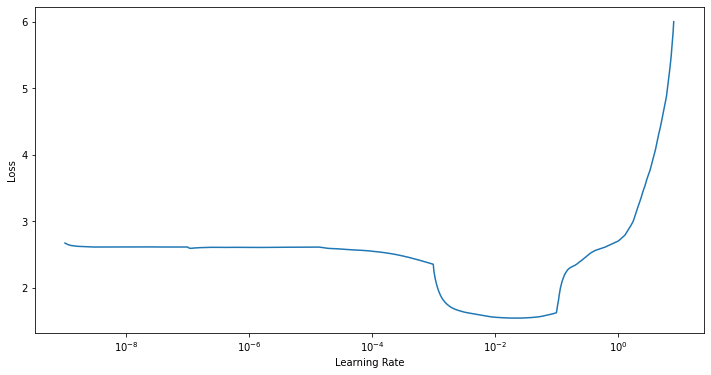

In [ ]:
# 5.1. Fit using Callback
lr_finder = LRFinder(min_lr=1e-9, max_lr=10)

lr_history = model.fit(input_train, y_train, batch_size=64, callbacks=[lr_finder], epochs=5)

In [ ]:
model.history.history

{'loss': [2.6118054389953613,
  2.607170820236206,
  2.325477361679077,
  1.6549170017242432,
  7.5738959312438965],
 'acc': [0.101133331656456,
  0.10013332962989807,
  0.1794833391904831,
  0.4291333258152008,
  0.144087553024292],
 'top_5_accuracy': [0.9488166570663452,
  0.9481333494186401,
  0.9303500056266785,
  0.7013000249862671,
  0.4120093286037445]}

In [ ]:
!git clone https://github.com/bckenstler/CLR.git

Cloning into 'CLR'...


We obtain min_lr = 10^-3, max_lr = 10^-2, from the curve output for 5.1


In [ ]:

## 5.2 - Cyclic Learning rate using exponential decay.
from CLR.clr_callback import CyclicLR
clr = CyclicLR(base_lr=0.001, max_lr=0.01,
                        step_size=3750, mode = "exp_range",gamma=0.99994)
clr_hist = model.fit(input_train, y_train, callbacks=[clr],epochs = 5)


Epoch 1/5
1875/1875 [==============================] - 68s 36ms/step - loss: 0.2741 - acc: 0.9013 - top_5_accuracy: 0.7538
Epoch 2/5
1875/1875 [==============================] - 78s 41ms/step - loss: 0.2804 - acc: 0.8993 - top_5_accuracy: 0.7143
Epoch 3/5
1875/1875 [==============================] - 80s 42ms/step - loss: 0.2311 - acc: 0.9172 - top_5_accuracy: 0.7384
Epoch 4/5
1875/1875 [==============================] - 80s 43ms/step - loss: 0.1677 - acc: 0.9395 - top_5_accuracy: 0.7146
Epoch 5/5
1875/1875 [==============================] - 84s 45ms/step - loss: 0.1418 - acc: 0.9483 - top_5_accuracy: 0.7044


In [ ]:
clr_hist.history

{'loss': [0.27407169342041016,
  0.28039348125457764,
  0.2311389148235321,
  0.16767102479934692,
  0.14175909757614136],
 'acc': [0.9013166427612305,
  0.8992833495140076,
  0.9172000288963318,
  0.9394999742507935,
  0.9482666850090027],
 'top_5_accuracy': [0.7537999749183655,
  0.7142833471298218,
  0.7383999824523926,
  0.7145833373069763,
  0.7044166922569275]}

Text(0, 0.5, 'Accuracy')

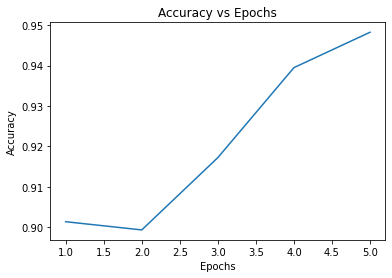

In [ ]:
# 5.2 - Accuracy Curve
plt.plot([1,2,3,4,5],clr_hist.history["acc"])
plt.title("Accuracy vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")


Text(0, 0.5, 'Loss')

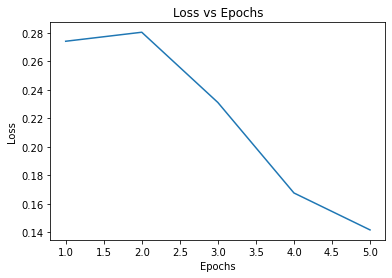

In [ ]:
# 5.2 - Loss Curve
plt.plot([1,2,3,4,5],clr_hist.history["loss"])
plt.title("Loss vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")

In [ ]:
! pip install torch

In [ ]:
# Q5.3 - Code run on GPU on Greene. Losses plotted in next cell.

from tensorflow.keras.optimizers import Adam
from keras.layers import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.convolutional import AveragePooling2D
from keras.layers.core import Activation
from keras.layers.core import Dropout
from keras.layers import Input
from keras.models import Model
from keras.layers import concatenate
from keras import backend as K
from keras.metrics import categorical_accuracy,top_k_categorical_accuracy
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras.losses import sparse_categorical_crossentropy
import matplotlib.pyplot as plt
import torch

device = ("cuda" if torch.cuda.is_available() else "cpu")

def conv_module(x,K,kX,kY, stride, chanDim, padding="same"):
        x = Conv2D(K, (kX, kY), strides=stride, padding=padding)(x)
        x = BatchNormalization(axis=chanDim)(x)
        x = Activation("relu")(x)
        return x

def inception_module(x, numK1x1, numK3x3, chanDim):
    conv_1x1 = conv_module(x, numK1x1, 1, 1,(1, 1), chanDim)
    conv_3x3 = conv_module(x, numK3x3, 3, 3,(1, 1), chanDim)
    x = concatenate([conv_1x1, conv_3x3], axis=chanDim)
    return x

def downsample_module(x, K, chanDim):
    conv_3x3 = conv_module(x, K, 3, 3, (2, 2),-1, padding="valid")
    pool = MaxPooling2D((3, 3), strides=(2, 2))(x)
    x = concatenate([conv_3x3, pool], axis=chanDim)
    return x

def build(width, height, depth, classes):
    inputShape = (height, width, depth)
    chanDim = -1
    
    inputs = Input(shape=inputShape)
    x = conv_module(inputs, 96, 3, 3, (1, 1),chanDim)
    x = inception_module(x, 32, 32, chanDim)
    x = inception_module(x, 32, 48, chanDim)
    x = downsample_module(x, 80, chanDim)
    x = inception_module(x, 112, 48, chanDim)
    x = inception_module(x, 96, 64, chanDim)
    x = inception_module(x, 80, 80, chanDim)
    x = inception_module(x, 48, 96, chanDim)
    x = downsample_module(x, 96, chanDim)
    x = inception_module(x, 176, 160, chanDim)
    x = inception_module(x, 176, 160, chanDim)
    x = AveragePooling2D((7, 7),padding = "same")(x)
    x = Dropout(0.5)(x)
    x = Flatten()(x)
    x = Dense(classes)(x)
    x = Activation("softmax")(x)
    model = Model(inputs, x, name="googlenet")
    return model

def top_5_accuracy(y_true, y_pred):
    return top_k_categorical_accuracy(y_true, y_pred, k=5)


batch_size = 64
img_width, img_height, img_num_channels = 28, 28, 1
loss_function = sparse_categorical_crossentropy
no_classes = 10
no_epochs = 5
# Input Data
(input_train, y_train), (input_test, y_test) = fashion_mnist.load_data()
# Determine shape of the data
input_shape = (img_width, img_height, img_num_channels)

# Parse numbers as floats
input_train = input_train.astype('float32').reshape((input_train.shape[0], img_width, img_height, img_num_channels))
input_test = input_test.astype('float32').reshape((input_test.shape[0], img_width, img_height, img_num_channels))

# Normalize data
input_train = input_train / 255
input_test = input_test / 255


optimizer = Adam(lr=0.01) # lr_max = 0.01

hists = []
for i in [32,64,128,256,512,1024,2048,4096,8192,16384]:
    lr = i
    model = build(28,28,1,10)
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['acc',top_5_accuracy])
    hist = model.fit(input_train, y_train, epochs = 5)
    hists.append(hist)
print(hists)
# Run on greene, losses obtained below, Greene output text file attached with solution

Text(0, 0.5, 'Loss')

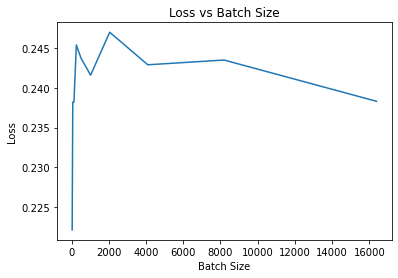

In [100]:
losses = [0.2221, 0.2382,0.2382, 0.2454, 0.2437, 0.2416, 0.2470, 0.2429, 0.2435, 0.2383]
plt.plot([32,64,128,256,512,1024,2048,4096,8192,16384],losses)
plt.title("Loss vs Batch Size")
plt.xlabel("Batch Size")
plt.ylabel("Loss")

The generalization is similar when compared to cyclical learning rate policy.